# Setup YOLO5

Nous allons comme le dit la doc de yolo cloné le depot et installer les modules nécessaire.
Ensuite nous allons ajouter notre fichier yaml pour linker les data et yolo

In [8]:
%%bash
git clone https://github.com/ultralytics/yolov5
cd yolov5 
python3 -m pip install -r requirements.txt
cp ../VOC.yaml .

# Entrainement Yolo5

In [11]:
%%bash
cd yolov5 
python3 train.py --img 32 --batch 16 --epochs 50 --data VOC.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=VOC.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 3 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.9.6 torch-1.13.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0

Error while terminating subprocess (pid=31900): 


     23/499         0G    0.03002   0.007683   0.002408         39        320:  53%|█████▎    | 29/55 [01:35<01:25,  3.28s/it]
Traceback (most recent call last):
  File "/Users/mass/Documents/Cours/H3/M2/AI/TrafficSign/Deep_AI/SignIA/yolov5/train.py", line 634, in <module>
    main(opt)
  File "/Users/mass/Documents/Cours/H3/M2/AI/TrafficSign/Deep_AI/SignIA/yolov5/train.py", line 528, in main
    train(opt.hyp, opt, device, callbacks)
  File "/Users/mass/Documents/Cours/H3/M2/AI/TrafficSign/Deep_AI/SignIA/yolov5/train.py", line 317, in train
    scaler.scale(loss).backward()
  File "/Users/mass/Library/Python/3.9/lib/python/site-packages/torch/_tensor.py", line 487, in backward
    torch.autograd.backward(
  File "/Users/mass/Library/Python/3.9/lib/python/site-packages/torch/autograd/__init__.py", line 197, in backward
    Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
KeyboardInterrupt


# Test de yolo

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/mass/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-1-8 Python-3.9.6 torch-1.13.0 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


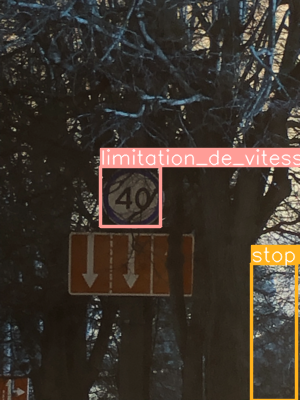

In [111]:

import os 

import numpy as np
import cv2
import torch

path = './data/images'
model = torch.hub.load('ultralytics/yolov5', 'custom', path='myYOLO/best.pt', force_reload=True)
imgs = os.listdir('./data/images')
imgname = np.random.choice(imgs)
img = cv2.imread(f'./data/images/{imgname}')
results = model(img).show()